<a href="https://colab.research.google.com/github/pusane/AM_in_Python/blob/master/FrequencyModulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Frequency Modulation and Demodulation using Python**

We would first like to import the relevant libraries (notice the shorthands we define for convenience)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

Define carrier properties


In [0]:
# carrier signal properties
carrier_amplitude = 1
carrier_frequency = 4000.0 #Hz

# initialize the time vector
sampling_frequency = 44100 #Hz
signal_duration = 5 #seconds
time = np.arange(signal_duration*sampling_frequency) / sampling_frequency

# calculate the carrier signal
carrier = carrier_amplitude*np.cos(2*np.pi*carrier_frequency*time)  

# modulation coefficient
kf = 10000

Define message source

In [3]:
# message signal properties
message_frequency = 40.0 #Hz
message_bandwidth = 60 #Hz
message_amplitude = 1

# calculate the message signal
message = message_amplitude*np.cos(2*np.pi*message_frequency*time)

# initialize an audio player
Audio(message,rate=sampling_frequency)


Plot the message and modulated signals

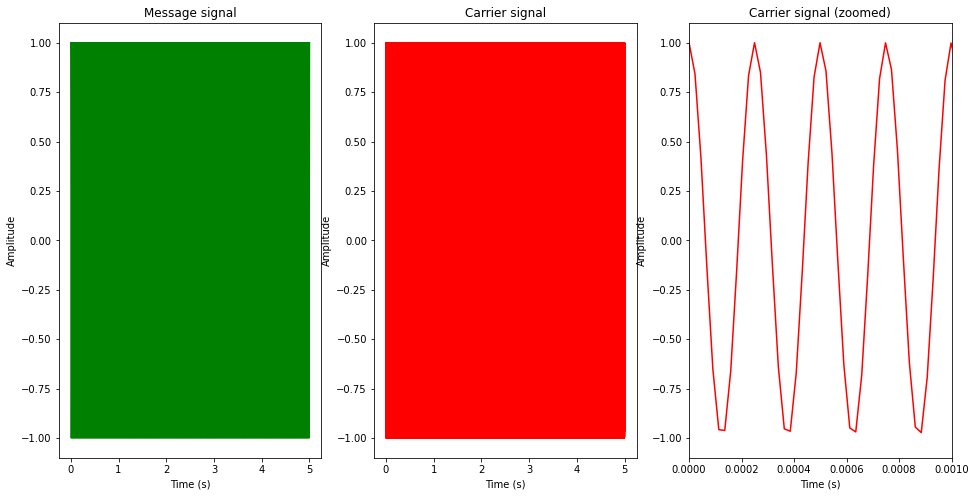

In [4]:
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.plot(time,message,'g')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Message signal')

plt.subplot(1,3,2)
plt.plot(time,carrier, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Carrier signal')

plt.subplot(1,3,3)
plt.plot(time,carrier, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Carrier signal (zoomed)')
plt.axis([0, 0.001, -1.1, 1.1])

plt.show()

Modulation step

In [5]:
# initialize the array for the modulated signal
max_message_amplitude = max(abs(message))
modulated = np.zeros_like(message)
a = np.zeros_like(message)
for i, t in enumerate(time):
    if i>1:
      a[i] = a[i-1] + message[i] * (time[i]-time[i-1])
    modulated[i] = carrier_amplitude*np.cos(2*np.pi*carrier_frequency*t+kf * a[i])

modulated_in_frequency = np.fft.fft(modulated)
modulated_in_frequency_indices = np.fft.fftfreq(modulated.size, 1/sampling_frequency)

# initialize an audio player
Audio(modulated, rate=sampling_frequency)

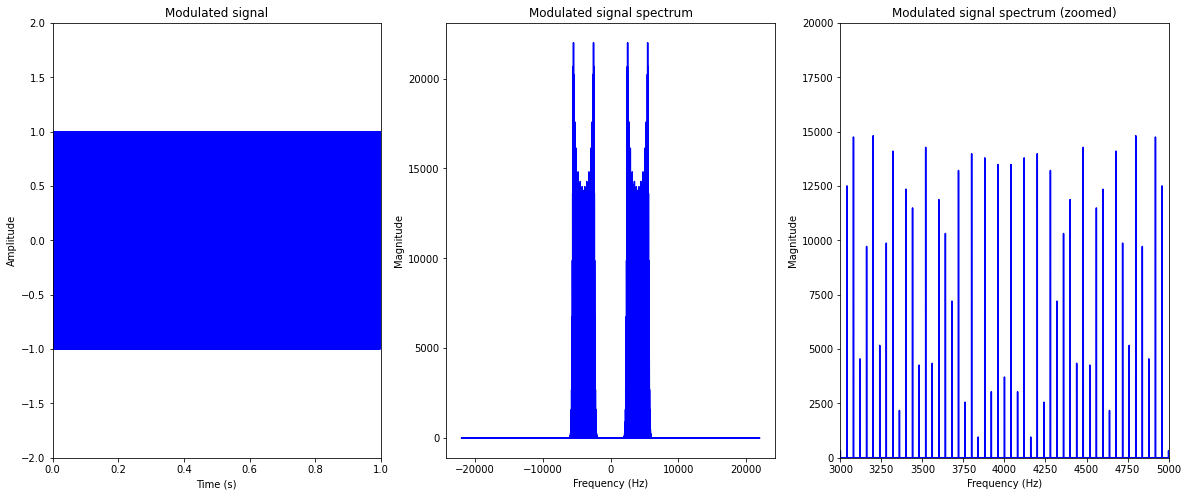

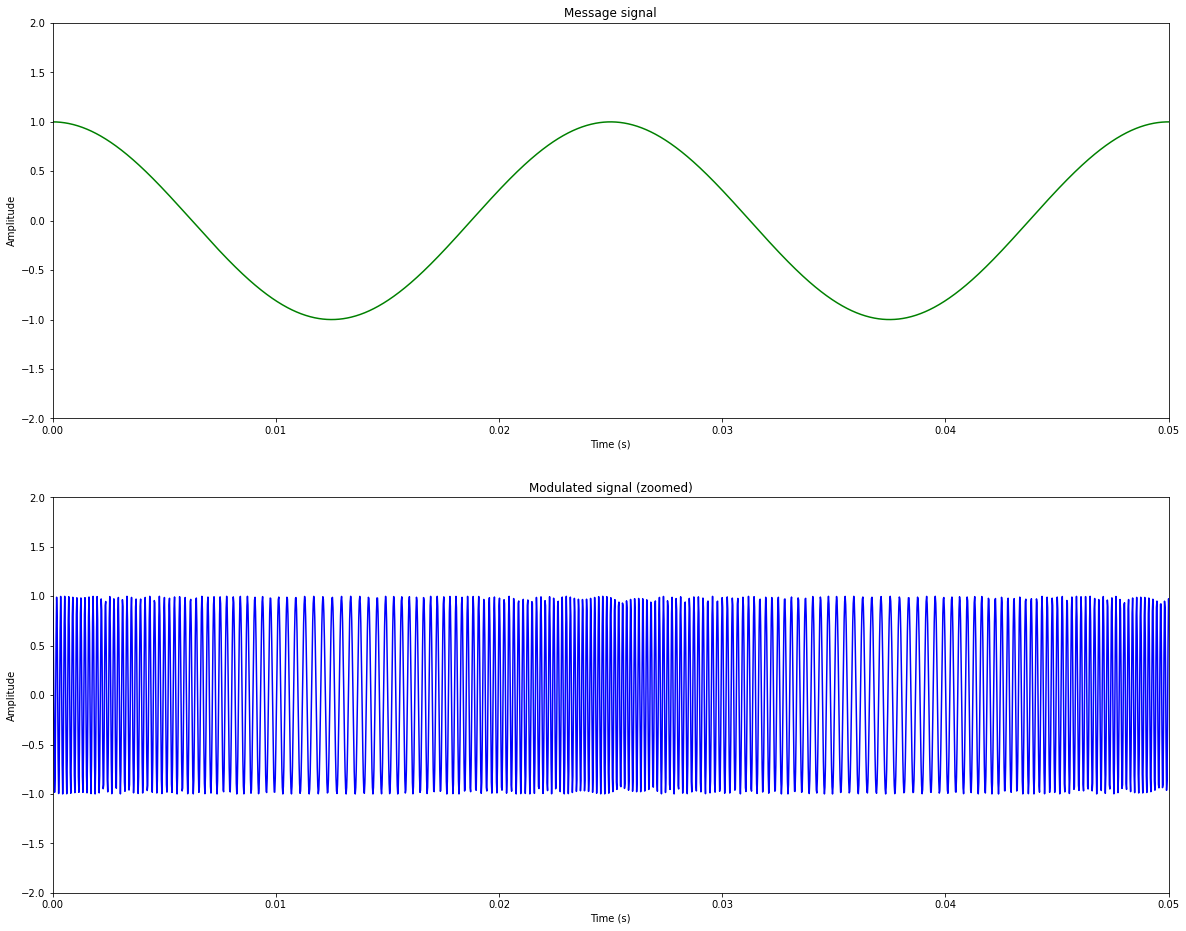

In [6]:
# plot the obtained signal in both time and frequency
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.plot(time, modulated, 'b')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Modulated signal')
plt.axis([0, 1, -2, 2])

plt.subplot(1,3,2)
plt.plot(modulated_in_frequency_indices, abs(modulated_in_frequency), 'b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Modulated signal spectrum')

plt.subplot(1,3,3)
plt.plot(modulated_in_frequency_indices, abs(modulated_in_frequency), 'b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Modulated signal spectrum (zoomed)')
plt.axis([3000, 5000, 0, 20000])

plt.show()

plt.figure(figsize=(20,16))

plt.subplot(2,1,1)

plt.plot(time,message,'g')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Message signal')
plt.axis([0, 0.05, -2, 2])

plt.subplot(2,1,2)
plt.plot(time, modulated, 'b')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Modulated signal (zoomed)')
plt.axis([0, 0.05, -2, 2])

plt.show()

Demodulation step

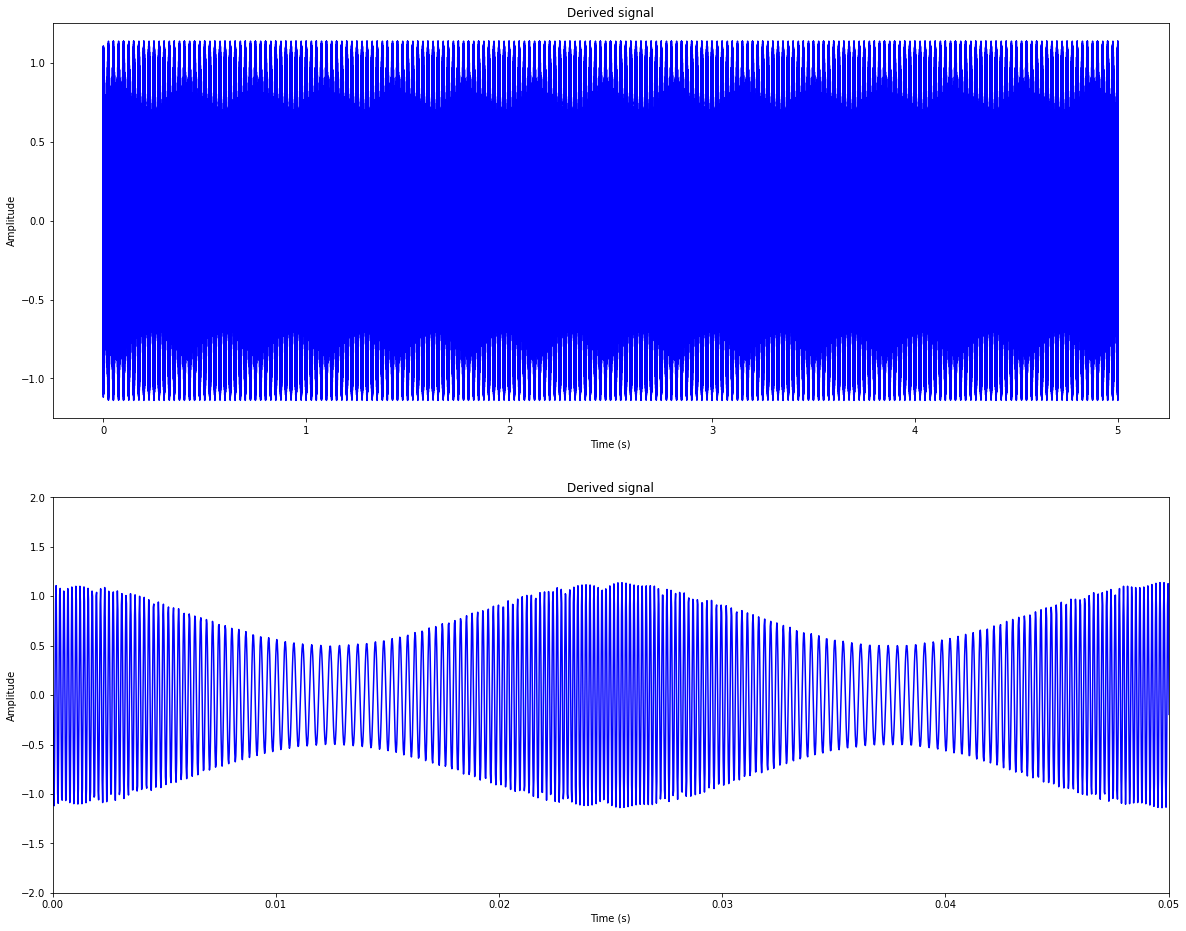

In [7]:
# initialize the array for the product signal
derived_signal = np.zeros_like(message)
for i, t in enumerate(time):
  if i > 0:
    derived_signal[i] = (modulated[i]-modulated[i-1])/(time[i]-time[i-1])
    derived_signal[i] = derived_signal[i] / 30000

# plot the obtained signal in both time and frequency
plt.figure(figsize=(20,16))

plt.subplot(2,1,1)
plt.plot(time, derived_signal, 'b')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Derived signal')

plt.subplot(2,1,2)
plt.plot(time, derived_signal, 'b')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Derived signal')
plt.axis([0, 0.05, -2, 2])

plt.show()

(0.0, 0.05, -0.06, 0.06)

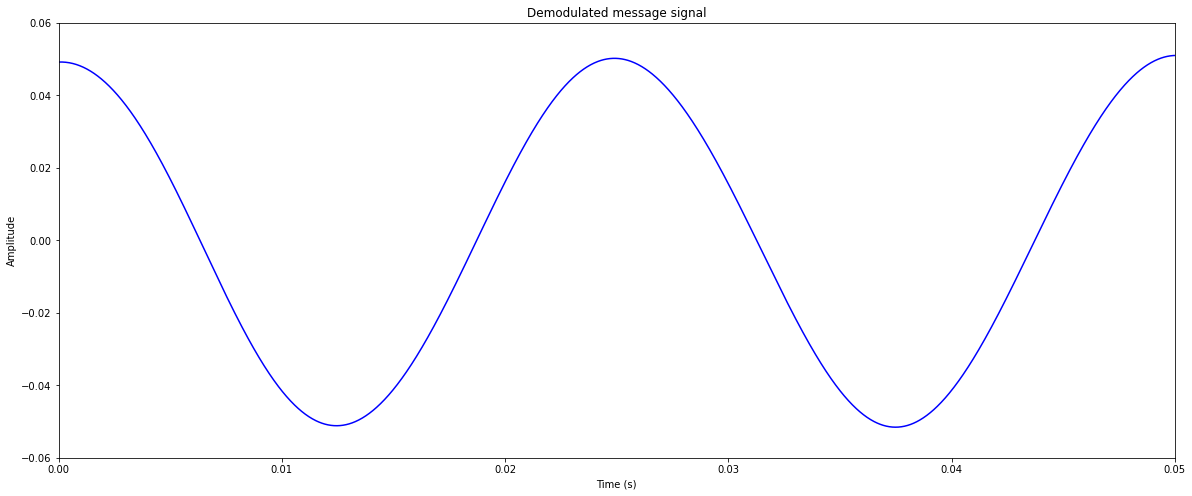

In [10]:
# now employ an envelope detector
# first pass the signal through a rectifier
positive_derived_signal = np.zeros_like(message)
positive_derived_signal[derived_signal>0] = derived_signal[derived_signal>0]

# take the Fourier transform 
positive_derived_signal_in_frequency = np.fft.fft(positive_derived_signal)
positive_derived_signal_in_frequency_indices = np.fft.fftfreq(positive_derived_signal.size, 1/sampling_frequency)

# now use an LPF to filter out the message
filtered_output_in_frequency = np.zeros_like(positive_derived_signal_in_frequency)
for i in range(round(positive_derived_signal_in_frequency.size/(sampling_frequency/2)*message_bandwidth)):
    filtered_output_in_frequency[i] = positive_derived_signal_in_frequency[i]

filtered_output = np.fft.ifft(filtered_output_in_frequency)

# also filter out the DC component
filtered_output -= filtered_output.mean()

plt.figure(figsize=(20,8))

plt.plot(time,filtered_output.real, 'b')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Demodulated message signal')
plt.axis([0, 0.05, -0.06, 0.06])